In [1]:
cd ..

/Users/huttercl/Documents/StrokeRecovery/CorrelationGraph4Stroke_public


In [2]:
import pandas as pd
import numpy as np
import os
from StrokeRecovery import utils, preprocessing
from StrokeRecovery import interactionmodel as IM
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import signal 
from StrokeRecovery.graph_viz import GraphViz

np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

change_version = 'v1.6'
N_edges = 6
window='blackman'
norm='l1'

In [3]:
patients = pd.read_excel('data/ds2a_patients_{}.xlsx'.format(change_version), index_col=[0])
limos = pd.read_excel('data/ds2b_limos_{}.xlsx'.format(change_version), index_col=[0,1])

In [4]:
assert np.all( pd.isnull(limos).sum(axis=1)==0 )

In [5]:
patients['full_label'] =patients['diag_label'] + patients['loc_label'] 

In [6]:
def compute(column_name, value_name, save_path=None, n_edges=N_edges, show_title=False):
    selected_patients = patients[patients[column_name]==value_name]
    selected_limos = limos.loc[selected_patients.index]
    n = len(selected_patients)
    builder = preprocessing.LimosSequenceBuilder(selected_limos)
    normalized_sequences = builder.normalized_delta_sequences
    
   
    matrix = IM.estimate(normalized_sequences, window_name=window, norm=norm)


    title = "{}={} N={}".format(column_name, value_name, n)
    try:
        main_graph = GraphViz(matrix, builder.columns)
    except ValueError as e:
        print('skipped {} because:'.format(title), e)
        return
    
    graph_ax = main_graph.show_graph(n_edges, small_figure=True)
    knee_ax  = main_graph.knee_plot(n_edges)
    
    if show_title:
        graph_ax.set_title(title)
        knee_ax.set_title(title)

    if save_path is not None:
        file_title = title.replace(" ", "_")
        graph_ax.get_figure().savefig(os.path.join(save_path, 'timeseries_graph_{}.pdf'.format(file_title)), bbox_inches = 'tight')
        knee_ax.get_figure().savefig(os.path.join(save_path, 'timeseries_graph_{}_knee.pdf'.format(file_title)), bbox_inches = 'tight')
    
    return None



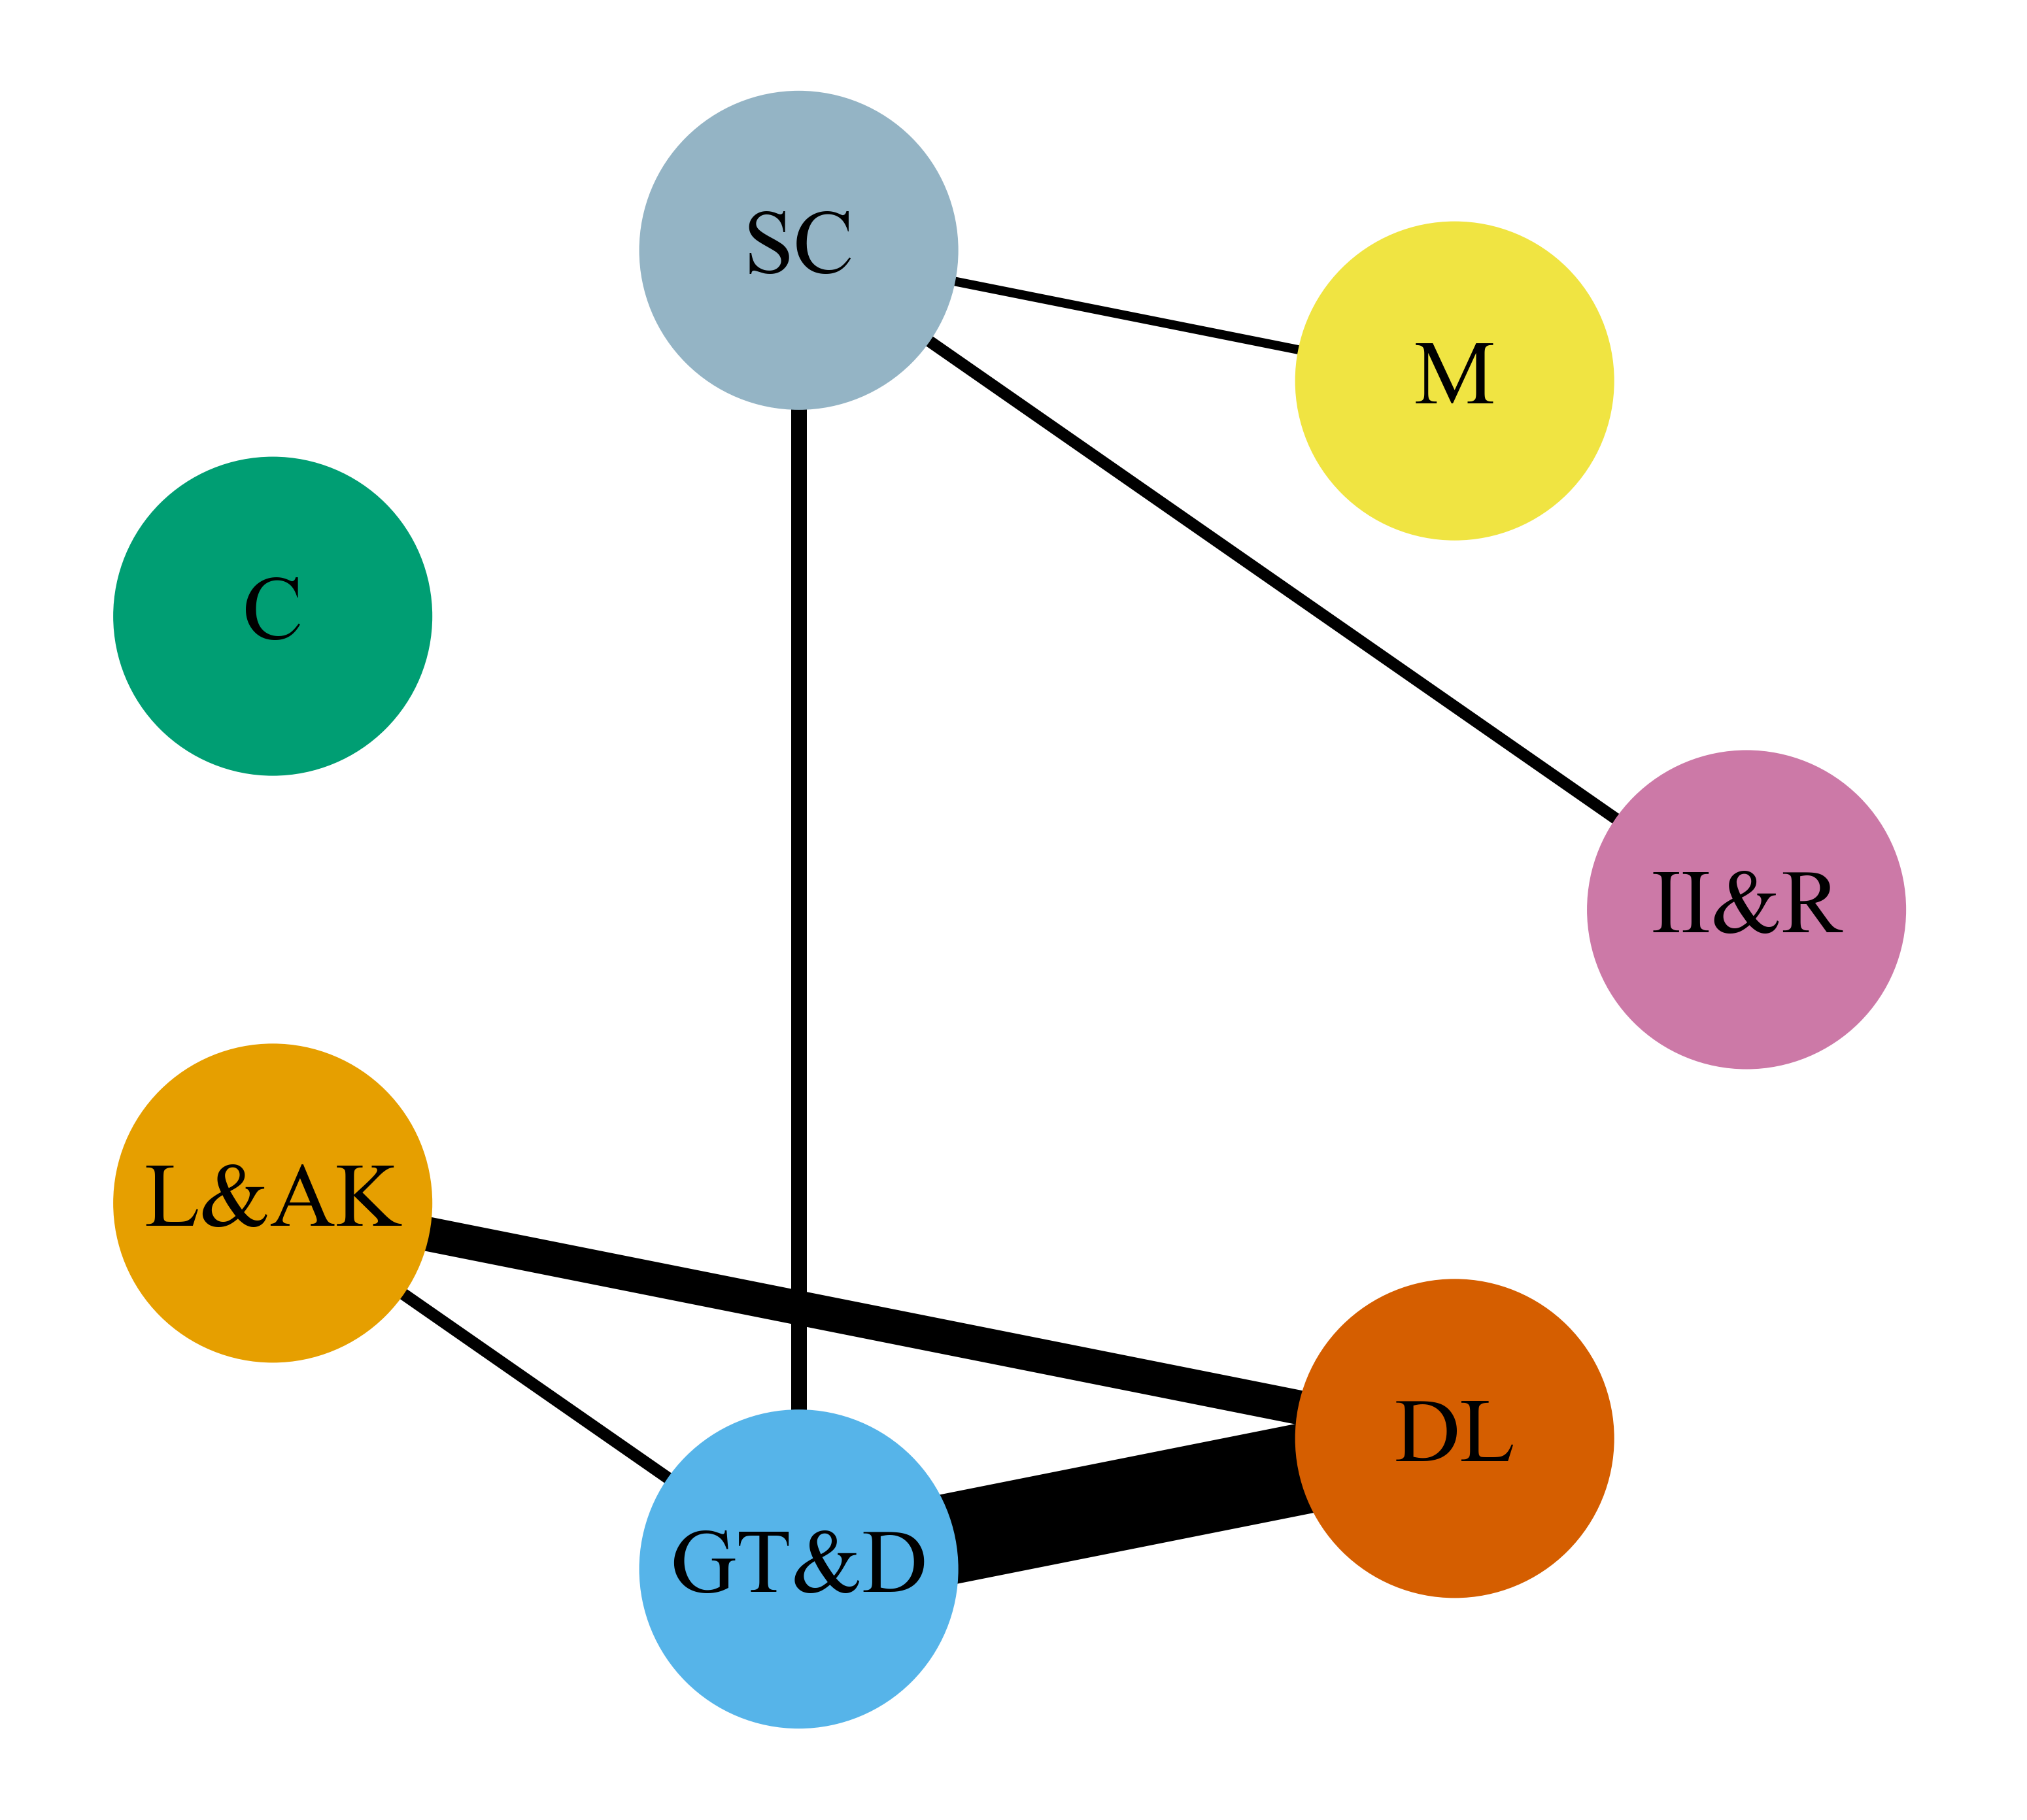

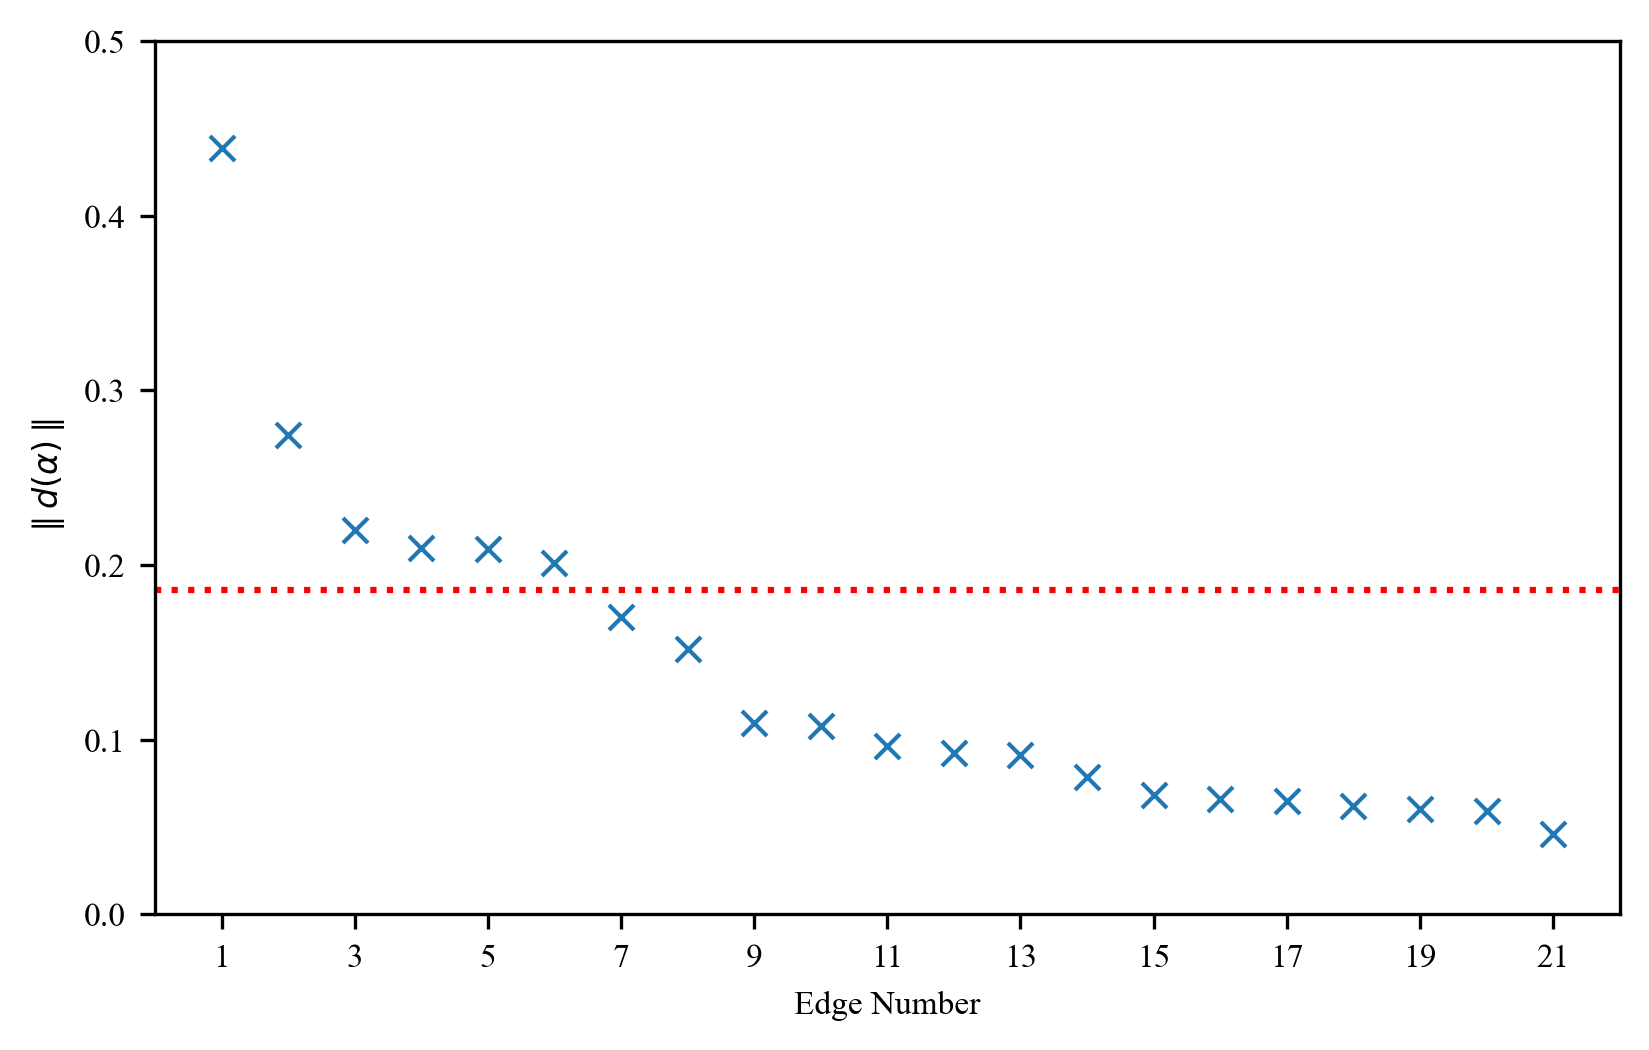

In [7]:
compute('loc_label', 'Left', save_path='figs/graphs')

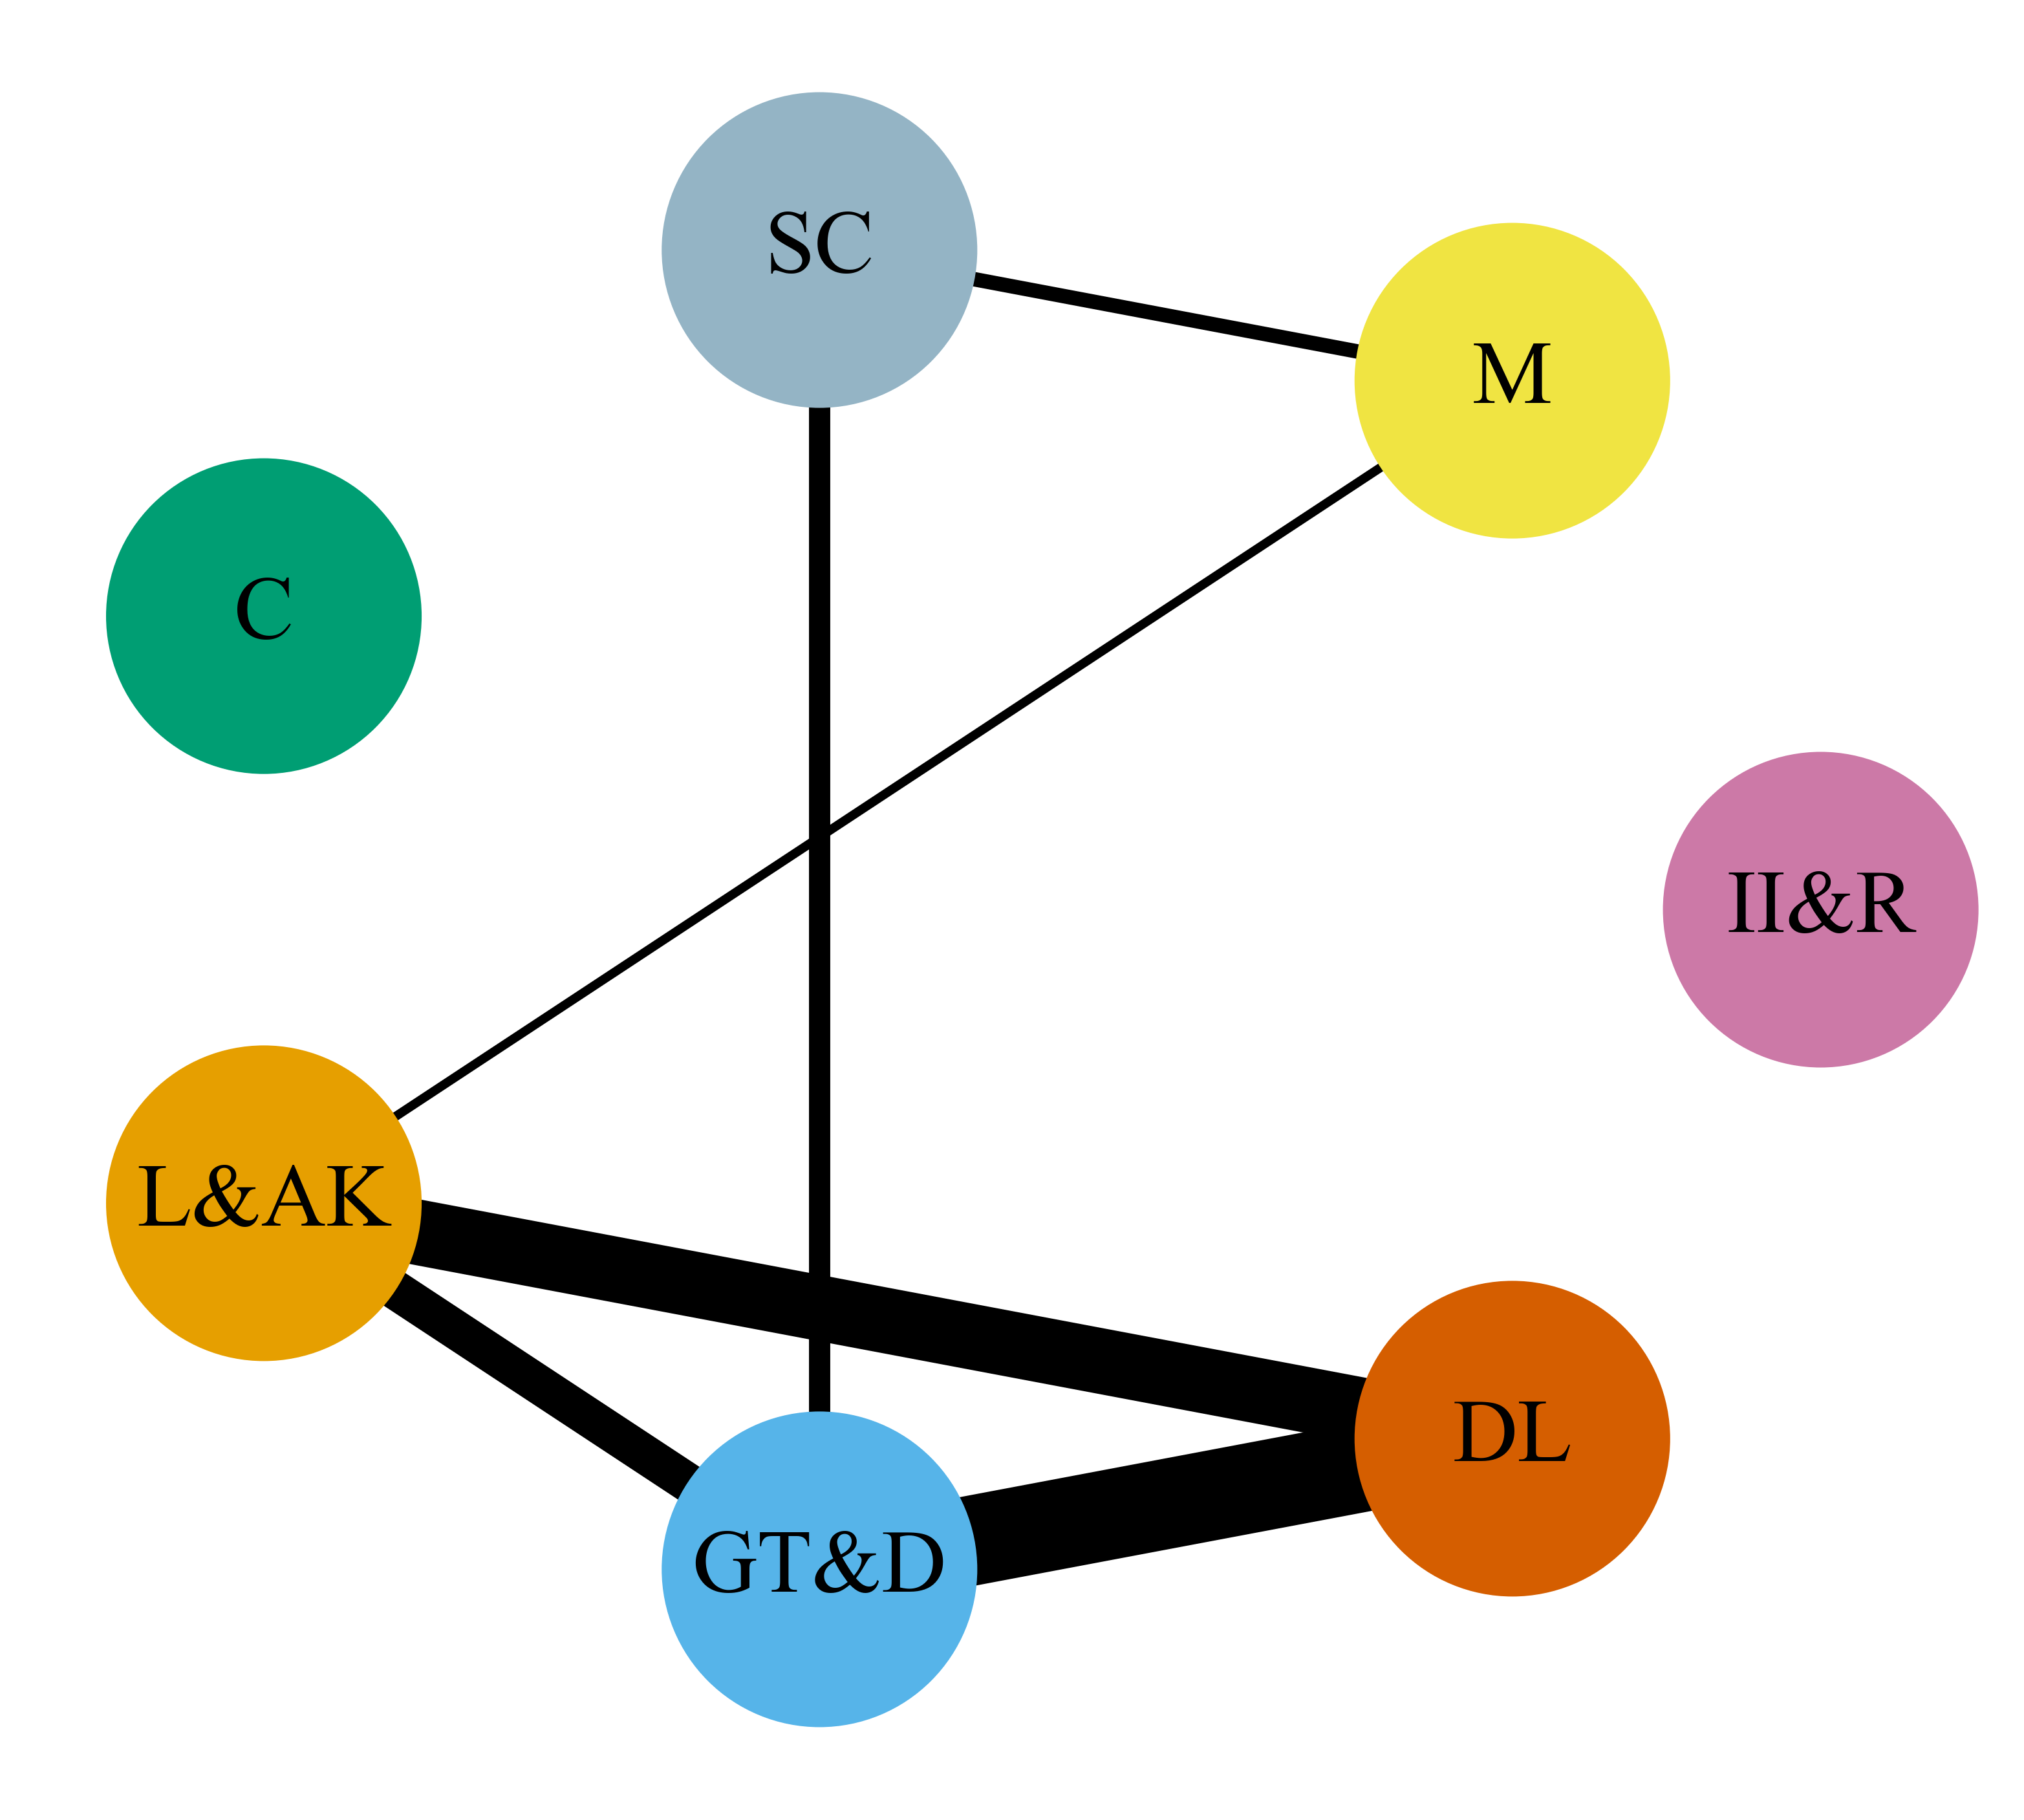

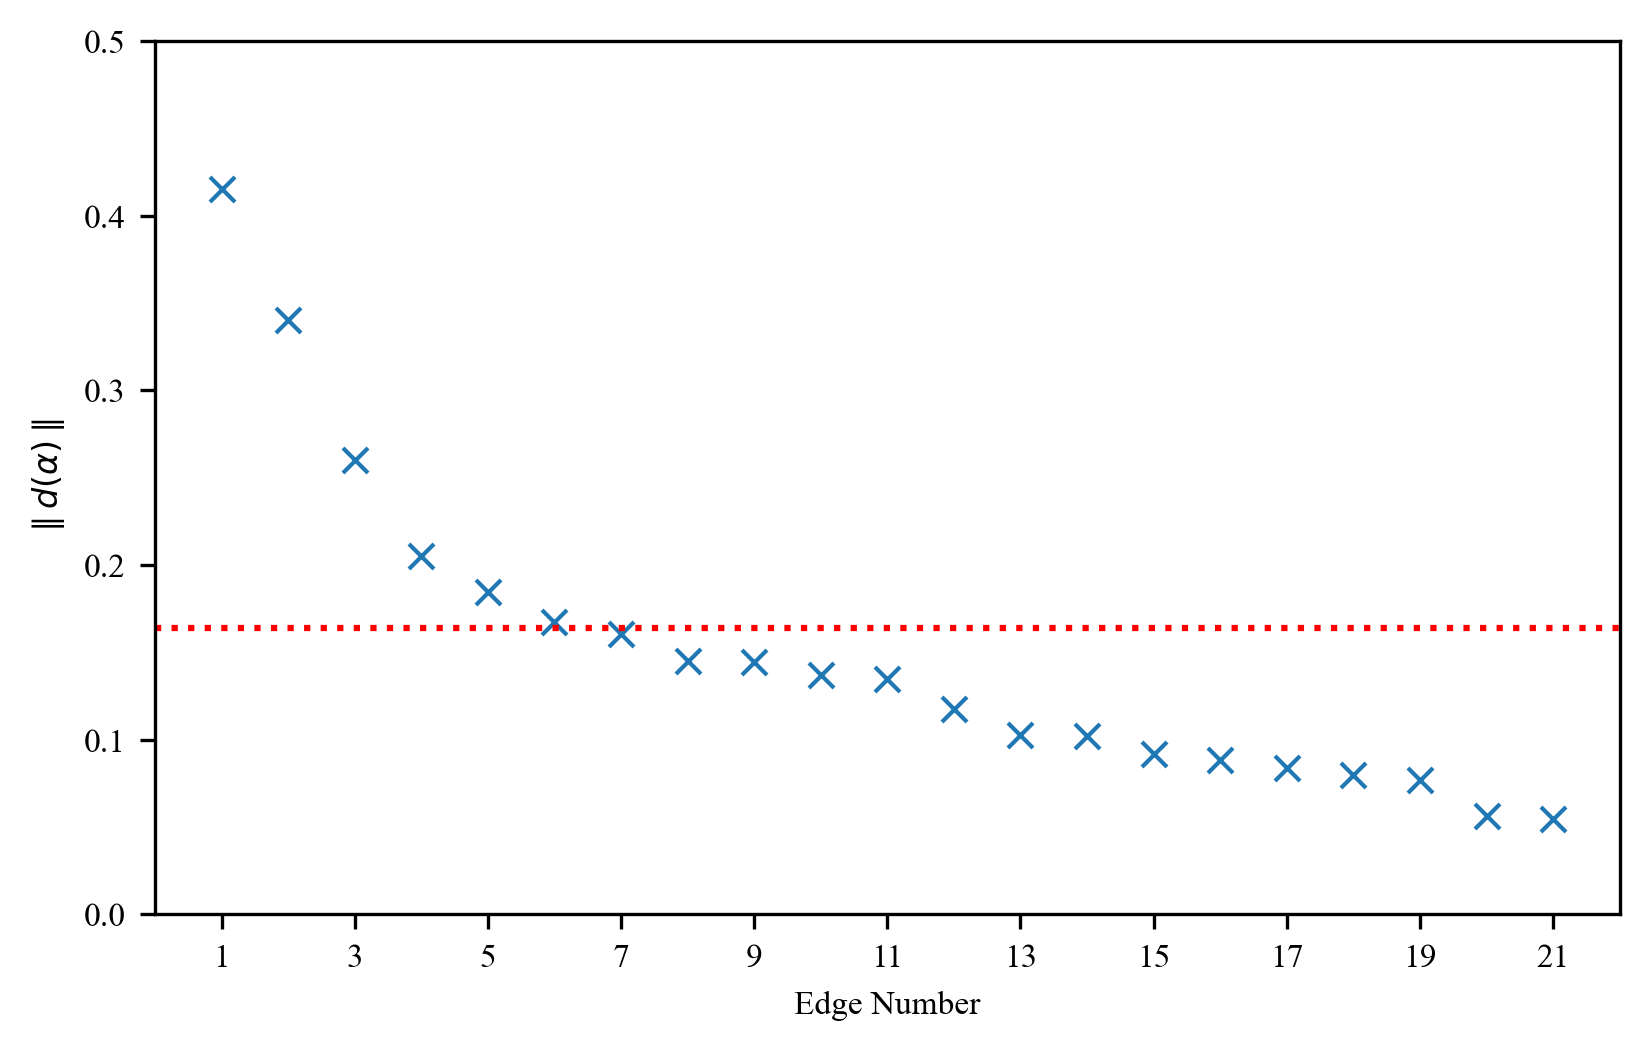

In [8]:
compute('loc_label', 'Right', save_path='figs/graphs')